<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Compute-volatility" data-toc-modified-id="Compute-volatility-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compute volatility</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Volatily

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the data
<hr style = "border:2px solid black" ></hr>

In [2]:
start = dt.datetime(1999, 1, 1)
end = dt.datetime(2008, 12, 31)

data = pdr.get_data_yahoo("^GSPC", start, end)

In [3]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-01-04,1248.810059,1219.099976,1229.229980,1228.099976,877000000,1228.099976
1999-01-05,1246.109985,1228.099976,1228.099976,1244.780029,775000000,1244.780029
1999-01-06,1272.500000,1244.780029,1244.780029,1272.339966,986900000,1272.339966
1999-01-07,1272.339966,1257.680054,1272.339966,1269.729980,863000000,1269.729980
1999-01-08,1278.239990,1261.819946,1269.729980,1275.089966,937800000,1275.089966
...,...,...,...,...,...,...
2008-12-24,869.789978,861.440002,863.869995,868.150024,1546550000,868.150024
2008-12-26,873.739990,866.520020,869.510010,872.799988,1880050000,872.799988
2008-12-29,873.700012,857.070007,872.369995,869.419983,3323430000,869.419983


In [4]:
data['Log returns'] = np.log(data['Adj Close']/data['Adj Close'].shift())

In [5]:
data['Adj Close'].iloc[-1]/data['Adj Close'].iloc[0]

0.7354857242538836

In [6]:
data['Log returns'].sum()

-0.3072241487090497

In [7]:
np.exp(data['Log returns'].sum())

0.7354857242538831

In [8]:
data['Normalize'] = data['Adj Close']/data['Adj Close'].iloc[0]

In [9]:
data['Exp sum'] = data['Log returns'].cumsum().apply(np.exp)

In [10]:
data[['Normalize', 'Exp sum']].tail()

,Normalize,Exp sum
Date,,
2008-12-24,0.706905,0.706905
2008-12-26,0.710691,0.710691
2008-12-29,0.707939,0.707939
2008-12-30,0.725218,0.725218
2008-12-31,0.735486,0.735486


# Compute volatility
<hr style = "border:2px solid black" ></hr>

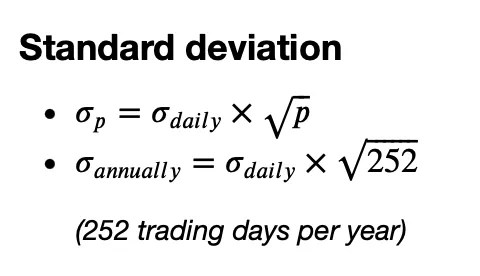

In [11]:
volatility = data['Log returns'].std()*(252**0.5)

In [12]:
volatility

0.21278321702789801

In [13]:
str_vol = str(round(volatility, 3)*100)

Text(0.5, 1.0, 'Historic Volatility for S&P 500 (21.3%)')

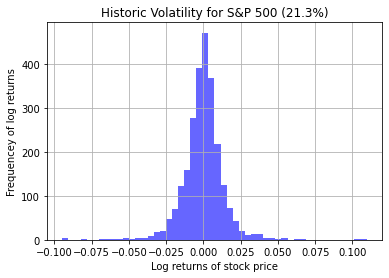

In [14]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log returns of stock price")
ax.set_ylabel("Frequencey of log returns")
ax.set_title("Historic Volatility for S&P 500 (" + str_vol +"%)")

In [15]:
np.log(1.2)+np.log(1.15)+np.log(1.1)+np.log(1.3)

0.6797579434409292

In [16]:
np.exp(0.6797579434409292)

1.9734

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/LearnPythonWithRune/PythonForFinancialAnalysis/blob/main/04%20-%20Volatility.ipynb
- https://www.learnpythonwithrune.org/start-python-with-pandas-for-financial-analysis/#lesson-6

</font>
</div>